#### Exploring sourcing financial data from Yahoo Finance using yfinance API 

Author: Thamu Mnyulwa

Last Updated: 16/04/2020 03:00am

A common problem for quantitative finance enthusiasts is finding data, particularly since many API's such as **eikon** require a large financial investment. Many open-source Python API's are available for finding financial data. The question was whether we could find one that performs this function for companies in South Africa, on the JSE. In this particular notebook we try <code>yfinance</code> API developed by [Ran Aroussi](https://github.com/ranaroussi) in an attempt to replicate the [Yahoo! finance](https://finance.yahoo.com/) API to import data directly into python which was discontinued.

* [yfinance official documentation](https://pypi.org/project/yfinance/) 
* [What is yfinance? Blog post](https://aroussi.com/post/python-yahoo-finance) 
* [Ran Aroussi's Github on yfinance](https://github.com/ranaroussi) 

---

**yfinance** API can import financial data, by webscrapping yahoo finance. It is installed as shown below.

##### Importing yfinance

```Python
#!setup.py install
#!pip install  yfinance

import yfinance as yf
```
[Requirements:](https://github.com/ranaroussi/yfinance)

* Python >= 2.7, 3.4+
* Pandas
* Numpy
* requests

In [1]:
#Preamble,
#!setup.py install
#!pip install  yfinance
#!pip install requests

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

The <code>Tickers()</code> module allows you to call on a particular security and collect both **market** (**structured data** such as "historical price") and **meta data** (**unstructured data** such as news/some text).
##### Using Tickes module on a single security


In [2]:
# Initialize Ticker objects " Change the ticker Symbol to"
Capitec = yf.Ticker('CPI.JO')
#Return the ticker object
print(Capitec)

yfinance.Ticker object <CPI.JO>


In [3]:
# Get the security info "yf.Ticker("MSFT").info" .info module
Capitec.info

{'zip': '7600',
 'sector': 'Financial Services',
 'fullTimeEmployees': 14590,
 'longBusinessSummary': 'Capitec Bank Holdings Limited, through its subsidiaries, provides various retail banking products and services in South Africa. The company offers various deposits products, including transaction and savings accounts; and credit facilities, credit cards, home loans, and personal term loans. It also provides point-of-sale payment solutions, salary transfer, workplace banking, Internet banking, and mobile banking services. As of February 2019, it operated approximately 840 branches and 5,011 ATMs. Capitec Bank Holdings Limited was incorporated in 1999 and is based in Stellenbosch, South Africa.',
 'city': 'Stellenbosch',
 'phone': '27 21 809 5900',
 'country': 'South Africa',
 'companyOfficers': [],
 'website': 'http://www.capitecbank.co.za',
 'maxAge': 1,
 'address1': '1 Quantum Street',
 'fax': '27 21 880 1207',
 'industry': 'Banks—Regional',
 'address2': 'Techno Park',
 'previousClos

In [8]:
# Ticker Symbol
Capitec.info['symbol'] 

'CPI.JO'

In [9]:
# Security Type
Capitec.info['quoteType'] 

'EQUITY'

In [10]:
# get historical market data
data = Capitec.history(period="max")
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-19,91.71,91.71,70.31,78.97,142376,0.0,0
2002-02-20,75.41,75.41,75.41,75.41,103,0.0,0
2002-02-21,75.41,75.41,61.14,61.14,170840,0.0,0
2002-02-22,61.14,62.16,61.14,61.14,1393434,0.0,0
2002-02-25,61.14,62.16,56.05,56.05,280677,0.0,0


In [10]:
data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-04-07,101800.0,118431.0,100250.0,108500.0,443467,0.0,0
2020-04-08,108500.0,108483.0,100000.0,102470.0,410980,0.0,0
2020-04-09,105200.0,108000.0,101812.0,107100.0,263414,0.0,0
2020-04-14,108113.0,109943.0,102500.0,105775.0,363324,0.0,0
2020-04-15,105774.0,105774.0,96000.0,96089.0,673798,0.0,0


The data seems to agree with the data on [Yahoo! finance for CPI.JO](https://finance.yahoo.com/quote/NLY/history?p=NLY).

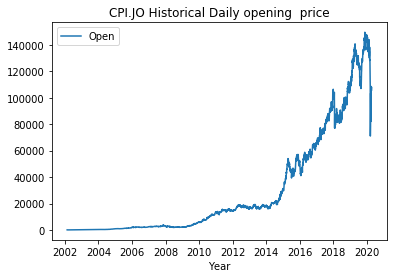

In [12]:
# Plot the historical opening price
plt.plot(data["Open"],label="Open")
#plt.plot(data["Volume"],label="High")
plt.legend(loc="best")
plt.xlabel("Price")
plt.xlabel("Year")
plt.title(Capitec.info['symbol'] + " Historical Daily opening  price")
plt.show()

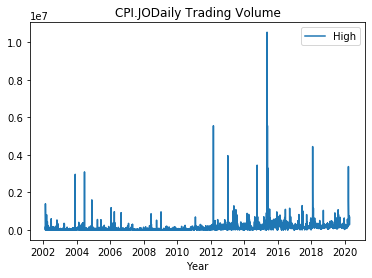

In [13]:
# Plot the Trading Volume
plt.plot(data["Volume"],label="High")
plt.legend(loc="best")
plt.xlabel("")
plt.xlabel("Year")
plt.title(Capitec.info['symbol'] + "Daily Trading Volume")
plt.show()

In [14]:
# show actions (dividends, splits)
Capitec.actions

,Dividends,Stock Splits
Date,,
2002-06-10,28.500,0.0
2003-06-09,19.000,0.0
2004-06-07,20.000,0.0
2005-06-06,30.000,0.0
2006-06-05,45.000,0.0
2006-11-27,20.000,0.0
2007-06-11,60.000,0.0
2007-11-26,25.000,0.0
2008-06-09,75.000,0.0


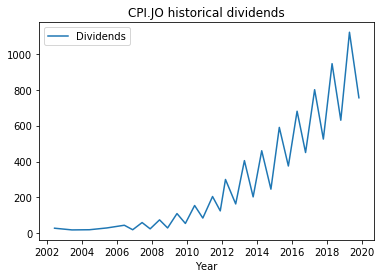

In [15]:
# Plot dividends
plt.plot(Capitec.dividends, label="Dividends" )
plt.legend(loc="best")
plt.ylabel("")
plt.xlabel("Year")
plt.title(Capitec.info['symbol'] + " historical dividends")
plt.show()

In [5]:
Capitec.balance_sheet

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


Already, we have found a problem with using <code>yfinance</code> API in order to import financial data. Since it cannot show the financials of Capitec, a well known bank in South Africa. We suggest using a different API. It was good fun learning so far though. For more on <code>yfinance</code> see [Reliably download historical market data from Yahoo! Finance with Python](https://aroussi.com/post/python-yahoo-finance) and [Awesome open source: yfinance](https://awesomeopensource.com/project/ranaroussi/yfinance). 

#### Conclusion 
The author of the API **Ran Aroussi** created a good API that imports market data well and works fast in python. We did run into some problems trying to get certain data that would be crucial towards analysis of a security which led to the conclusion that the API needs more improvement and is not be the best open-source way to import financial data into python. We ended the analysis prematurely as the API is not yet fully functional.

---

We went back to try a similar analysis with Microsoft, the ticker used in the API's documentation. To see whether the API can access the balance sheet and financials that are available on Yahoo! finances website.

In [19]:
import yfinance as yf

msft = yf.Ticker("MSFT")

In [30]:
# get stock info
msft.info

{'zip': '98052',
 'sector': 'Technology',
 'fullTimeEmployees': 144000,
 'longBusinessSummary': "Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. The company's Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); and Skype, Outlook.com, and OneDrive. It also provides LinkedIn that includes Talent and marketing solutions, and subscriptions; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. Its Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also provides support services and Microsoft consulting

In [20]:
# get historical market data
hist = msft.history(period="max")
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.06,0.07,0.06,0.06,1031788800,0.0,0.0
1986-03-14,0.06,0.07,0.06,0.06,308160000,0.0,0.0
1986-03-17,0.06,0.07,0.06,0.07,133171200,0.0,0.0
1986-03-18,0.07,0.07,0.06,0.06,67766400,0.0,0.0
1986-03-19,0.06,0.06,0.06,0.06,47894400,0.0,0.0


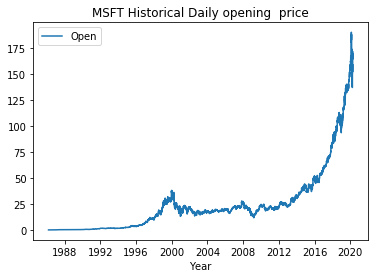

In [21]:
# Plot the historical opening price
plt.plot(hist["Open"],label="Open")
plt.legend(loc="best")
plt.xlabel("Price")
plt.xlabel("Year")
plt.title(msft.info['symbol'] + " Historical Daily opening  price")
plt.show()

In [22]:
# show financials (API not working)
msft.financials

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [27]:
# show financials API Not working
msft.quarterly_financials.head

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
